## I load the data into 3 seperate DFs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file
csv_file = "data_homophily.csv"  # Replace with your actual file path
df = pd.read_csv(csv_file)

# Get column names
columns = df.columns

# Split into three DataFrames
df_vacc = df[columns[:6]]   # First 6 columns
df_mask = df[columns[6:12]]  # Next 6 columns
df_test = df[columns[12:]]   # Last 6 columns

# Display the first few rows of each DataFrame
print("First DataFrame:")
print(df_vacc.head())

print("\nSecond DataFrame:")
print(df_mask.head())

print("\nThird DataFrame:")
print(df_test.head())


First DataFrame:
   vacc_self  vacc_others01  vacc_others02  vacc_others03  vacc_others04  \
0        5.0              0              0              0              0   
1        5.0              0              0              9              0   
2        5.0              0              0             48              0   
3        5.0             25             15             10              0   
4        5.0              0              0              0            100   

   vacc_others05  
0            100  
1             91  
2             52  
3             50  
4              0  

Second DataFrame:
   masks_self  masks_others_never  masks_others_sometimes  masks_others_half  \
0         5.0                   0                       0                  0   
1         5.0                   0                       0                  0   
2         5.0                   4                       0                 35   
3         5.0                   6                      15                

## Select here which data to look at (VACC = 0, MASK = 1, TEST = 2)

In [2]:
#behavior = 'Vaccination'

#behavior = 'Mask wearing'

behavior = 'Testing'

if behavior == 'Vaccination':
    df_current = df_vacc.copy()
    h_fabio = 1.84
if behavior == 'Mask wearing':
    df_current = df_mask.copy()
    h_fabio = 2.51
if behavior == 'Testing':
    df_current = df_test.copy()
    h_fabio = 2.33

df_current = df_current.dropna()  # Drops rows with any NaN values


## Compute Interaction Matrix

In [3]:

MAT = np.zeros((5, 5))
COUNT = np.zeros((5,1))
for index, row in df_current.iterrows():
    self_ix = int(row.iloc[0])-1
    row_data = [ row.iloc[i] for i in range(1,6) ]
    row_array = np.array(row_data, dtype=float)
    row_sum = row_array.sum()
    if row_sum > 0:
        normalized_row = row_array / row_sum
        MAT[self_ix, :] += normalized_row
        COUNT[self_ix,:] += 1
    
    #if index == 1:
    #    print(normalized_row)
        #print(row.iloc[1:6])
MATnorm = MAT / COUNT    

In [191]:
#print(MAT)
#print(COUNT)
#print(MAT / COUNT)


#MATnorm_vacc = MATnorm


In [192]:

#np.savetxt("data/MATnorm_vacc.csv", MATnorm_vacc, delimiter=",")
#np.savetxt("data/MATnorm_mask.csv", MATnorm_mask, delimiter=",")
#np.savetxt("data/MATnorm_test.csv", MATnorm_test, delimiter=",")




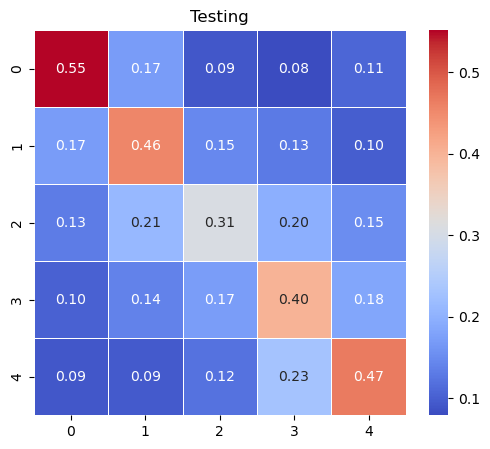

In [4]:
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.heatmap(MATnorm, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title(f"""{behavior}""")
plt.show()

## Compute Probabilities as a function of DIFFerences

In [45]:
DIFFs = np.zeros((9,1))
COUNTnorm = COUNT/COUNT.sum()
print(COUNTnorm)
for bi in range(5):
    for bj in range(5):
        diff = bj-bi
        #DIFFs[diff+4]+=MATnorm[bi,bj]
        #DIFFs[diff+4]+=MATnorm[bi,bj]*COUNTnorm[bi]
        #DIFFs[diff+4]+=MATnorm[bi,bj]*COUNTnorm[bi]*COUNTnorm[bj]
        dist = abs(diff)
        DIFFs[diff+4]+=MATnorm[bi,bj]/(5-dist)

#DIFFs_test = DIFFs
#print(DIFFs)

bestMODEL = np.zeros((9,1))
h_best = 2
fabioMODEL = np.zeros((9,1))

for diff in range(-4,5):
    dist = abs(diff/4)
    #print(dist)
    bestMODEL[diff+4] = np.exp(-h_best*dist)
    fabioMODEL[diff+4] = np.exp(-h_fabio*dist)
    
#print(MODEL)    

[[0.18218085]
 [0.29787234]
 [0.15558511]
 [0.1875    ]
 [0.1768617 ]]


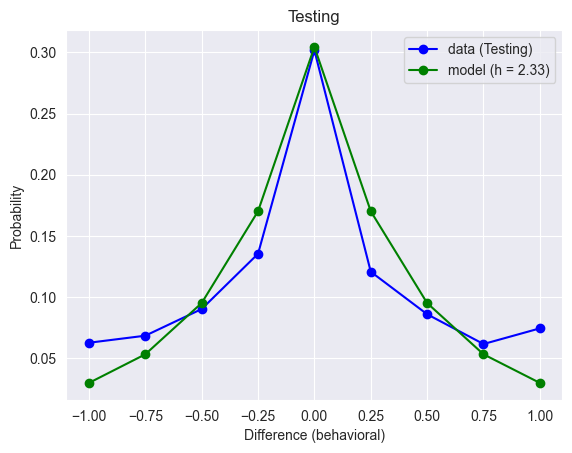

In [46]:
x_values = np.linspace(-1, 1, len(DIFFs))
plt.plot(x_values,DIFFs/DIFFs.sum(), marker='o', linestyle='-', color='b', label=f"""data ({behavior})""")
plt.plot(x_values,fabioMODEL/fabioMODEL.sum(), marker='o', linestyle='-', color='g', label=f"""model (h = {h_fabio})""")
#plt.plot(x_values,bestMODEL/bestMODEL.sum(), marker='o', linestyle='-', color='r', label=f"""model (h = {h_best})""")

plt.xlabel("Difference (behavioral)")
plt.ylabel("Probability")
plt.title(f"""{behavior}""")
plt.legend()
plt.grid(True)
plt.savefig(f"""figs/diff_{behavior}.pdf""", format="pdf", dpi=300, bbox_inches="tight")  # Save as PDF
plt.show()

In [47]:
# plt.plot(x_values,DIFFs_vacc/DIFFs_vacc.sum(), marker='o', linestyle='-', color='b', label=f"""data (Vaccination)""")
# plt.plot(x_values,DIFFs_mask/DIFFs_mask.sum(), marker='o', linestyle='-', color='g', label=f"""data (Mask wearing)""")
# plt.plot(x_values,DIFFs_test/DIFFs_test.sum(), marker='o', linestyle='-', color='r', label=f"""data (Testing)""")
# plt.plot(x_values,DIFFs/DIFFs.sum(), marker='o', linestyle='-', color='y', label=f"""data ({behavior})""")
# plt.xlabel("Difference (behavioral)")
# plt.ylabel("Probability")
# plt.title(f"""Behaviors""")
# plt.legend()
# plt.grid(True)
# 
# plt.savefig("figs/diff_alldata.pdf", format="pdf", dpi=300, bbox_inches="tight")  # Save as PDF
# 
# plt.show()

## Compute h that minimizes MSE wrt empirical DIFF

Minimum at 2.0253164556962027 with MSE = [0.00617977]
[[-0.05394783]
 [-0.04503081]
 [-0.02692232]
 [ 0.03640656]
 [ 0.16496855]
 [ 0.05111145]
 [-0.02265401]
 [-0.03821101]
 [-0.06572057]]


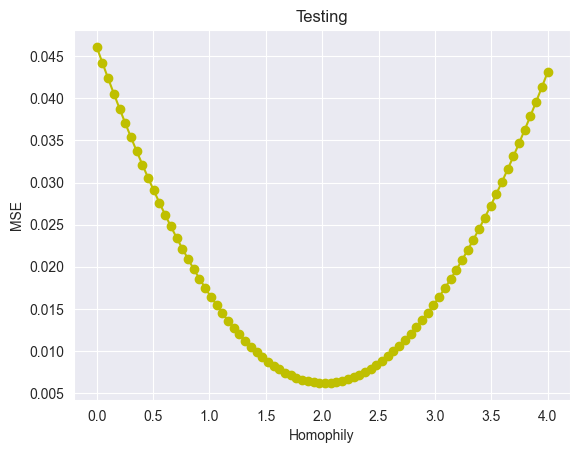

In [48]:
samples = 80
MSE = np.zeros((samples,1))
h_values = np.linspace(0, 4, samples)
DIFFs_norm = DIFFs/DIFFs.sum()

for hx,h in enumerate(h_values):
    MODEL = np.zeros((9,1))
    for diff in range(-4,5):
        dist = abs(diff/4)
        MODEL[diff+4] = np.exp(-h*dist)
    MODEL_norm = MODEL/MODEL.sum()
    mserror = sum( np.square(MODEL_norm - DIFFs_norm))
    #mserror = sum( abs(MODEL_norm - DIFFs_norm))
    MSE[hx] = mserror

min_index = np.argmin(MSE)  # Index of min MSE
min_h = h_values[min_index]  # Corresponding h_value
min_mse = MSE[min_index]  # Minimum MSE value

print(f"""Minimum at {min_h} with MSE = {min_mse}""")

print(MODEL_norm - DIFFs_norm)

plt.plot(h_values,MSE, marker='o', linestyle='-', color='y', label=f"""data ({behavior})""")
plt.xlabel("Homophily")
plt.ylabel("MSE")
plt.title(f"""{behavior}""")
#plt.legend()
plt.grid(True)

plt.savefig(f"""figs/mse_{behavior}.pdf""", format="pdf", dpi=300, bbox_inches="tight")  # Save as PDF

plt.show()





## Compare IRFs in DIFF space

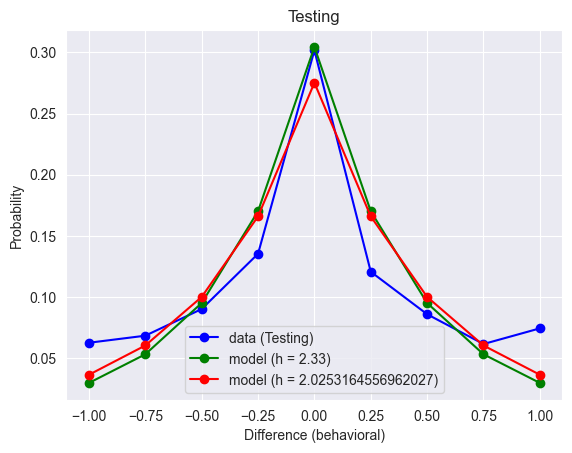

In [49]:

MODEL = np.zeros((9,1))
for diff in range(-4,5):
    dist = abs(diff/4)
    MODEL[diff+4] = np.exp(-min_h*dist)
MODEL_norm = MODEL/MODEL.sum()

x_values = np.linspace(-1, 1, len(DIFFs))
plt.plot(x_values,DIFFs/DIFFs.sum(), marker='o', linestyle='-', color='b', label=f"""data ({behavior})""")
plt.plot(x_values,fabioMODEL/fabioMODEL.sum(), marker='o', linestyle='-', color='g', label=f"""model (h = {h_fabio})""")
plt.plot(x_values,MODEL_norm, marker='o', linestyle='-', color='r', label=f"""model (h = {min_h})""")

plt.xlabel("Difference (behavioral)")
plt.ylabel("Probability")
plt.title(f"""{behavior}""")
plt.legend()
plt.grid(True)
plt.savefig(f"""figs/diff_{behavior}.pdf""", format="pdf", dpi=300, bbox_inches="tight")  # Save as PDF
plt.show()

## Compute h that minimized MSE over Matrix elements

Minimum at 2.481012658227848 with MSE = [0.00190747]


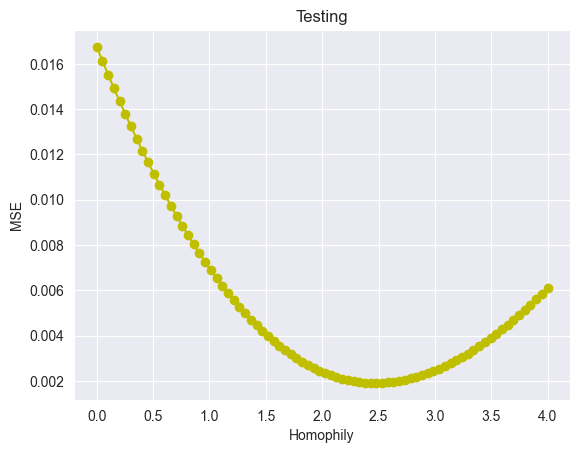

In [50]:
samples = 80
MSE = np.zeros((samples,1))
h_values = np.linspace(0, 4, samples)
#DIFFs_norm = DIFFs/DIFFs.sum()

#MATnorm

for hx,h in enumerate(h_values):
    MODEL = np.zeros((5, 5))
    for bi in range(0,5):
        for bj in range(0,5):
            dist = abs(bj - bi)/4
            #print(dist)
            MODEL[bi,bj] = np.exp(-h*dist)
    row_sums = MODEL.sum(axis=1, keepdims=True)
    MODEL_norm = MODEL / row_sums
    mse = np.mean((MODEL_norm - MATnorm) ** 2)
    MSE[hx] = mse
            

min_index = np.argmin(MSE)  # Index of min MSE
min_h = h_values[min_index]  # Corresponding h_value
min_mse = MSE[min_index]  # Minimum MSE value

print(f"""Minimum at {min_h} with MSE = {min_mse}""")

#print(MODEL_norm - DIFFs_norm)

plt.plot(h_values,MSE, marker='o', linestyle='-', color='y', label=f"""data ({behavior})""")
plt.xlabel("Homophily")
plt.ylabel("MSE")
plt.title(f"""{behavior}""")
#plt.legend()
plt.grid(True)

plt.savefig(f"""figs/mse_matrix_{behavior}.pdf""", format="pdf", dpi=300, bbox_inches="tight")  # Save as PDF

plt.show()

## Compare Matrices

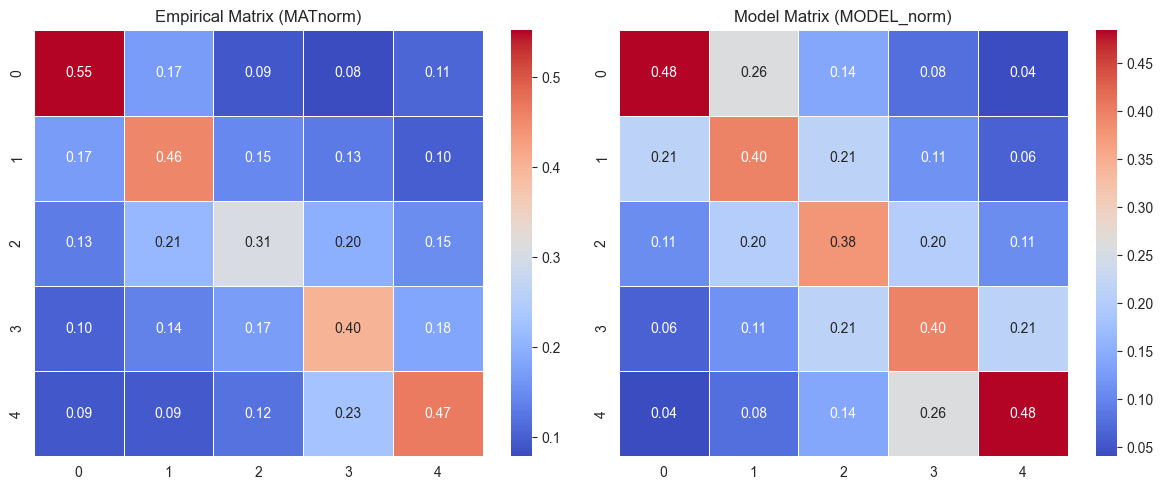

In [51]:
for bi in range(0,5):
    for bj in range(0,5):
        dist = abs(bj - bi)/4
        #print(dist)
        MODEL[bi,bj] = np.exp(-min_h*dist)
row_sums = MODEL.sum(axis=1, keepdims=True)
MODEL_norm = MODEL / row_sums

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Heatmap for MATnorm
sns.heatmap(MATnorm, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5, ax=axes[0])
axes[0].set_title("Empirical Matrix (MATnorm)")

# Heatmap for MODEL_norm
sns.heatmap(MODEL_norm, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5, ax=axes[1])
axes[1].set_title("Model Matrix (MODEL_norm)")

plt.tight_layout()
plt.show()